# Introduction à la Visualisation de Données avec Matplotlib

*Par MEFIRA Mohamadou*  
*Contact: [WhatsApp](https://wa.me/+237695450719) | [Email](mailto:mmefira19@gmail.com)*

## Table des matières
- [Introduction](#introduction)
- [Avant de commencer](#avant-de-commencer)
- [Importation et nettoyage des données](#importation-et-nettoyage-des-données)
- [Notre première figure avec Matplotlib](#notre-première-figure-avec-matplotlib)
- [Nuage de points avec `plot()`](#nuage-de-points-avec-plot)
- [Combiner avec `subplot()`](#combiner-avec-subplot)
- [Combiner plusieurs figures avec `subplots`](#combiner-plusieurs-figures-avec-subplots)
- [Les différents types de graphes](#les-différents-types-de-graphes)
- [Conclusion](#conclusion)

## Introduction

Ce notebook vous propose une introduction pratique à **Matplotlib**, la bibliothèque de référence pour la visualisation de données en Python. Il constitue une base solide pour approfondir vos compétences en data visualization.

La progression pédagogique s'inspire du livre d'*Amandine VELT* intitulé *Python pour la Data Science*, tout en proposant des exemples originaux. Notre objectif n'est pas de faire une analyse approfondie des données, mais plutôt d'explorer les multiples possibilités offertes par Matplotlib pour représenter visuellement vos données.

> 💡 **Vous souhaitez expérimenter ?** Contactez-moi pour recevoir :
> - [Le notebook complet au format .ipynb](https://wa.me/+237695450719?text=Salut%20Mefira%20!%20J'ai%20lu%20ton%20notebook%20sur%20matplotlib.%20Puis-je%20avoir%20le%20fichier%20ipynb.)
> - Le dataset des athlètes olympiques de 1886 à 2016 utilisé dans les exemples
> - [Partagez vos retours](https://wa.me/+237695450719?text=Salut%20Mefira%20!%20J'ai%20lu%20ton%20notebook%20sur%20matplotlib%20et%20j'ai%20quelques%20retours%20à%20te%20faire.)

## Avant de commencer

### Prérequis
Pour tirer le meilleur parti de ce tutoriel, vous devez déjà maîtriser :
- Les bases du langage Python
- Les fondamentaux de NumPy
- L'utilisation de base de Pandas

### Architecture de Matplotlib

Matplotlib est une bibliothèque orientée objet qui s'organise en trois couches d'abstraction, comme illustré ci-dessous :

![Architecture de Matplotlib](attachment:e59b15ce-6d15-449f-b60c-7b86595a0c6e.jpg)

Pour simplifier notre travail, nous utiliserons principalement la sous-bibliothèque `pyplot`, qui nous permet d'accéder facilement à la couche script de Matplotlib.

### Bonnes pratiques avec Matplotlib

Pour créer des visualisations efficaces avec Matplotlib, suivez cette structure standard :

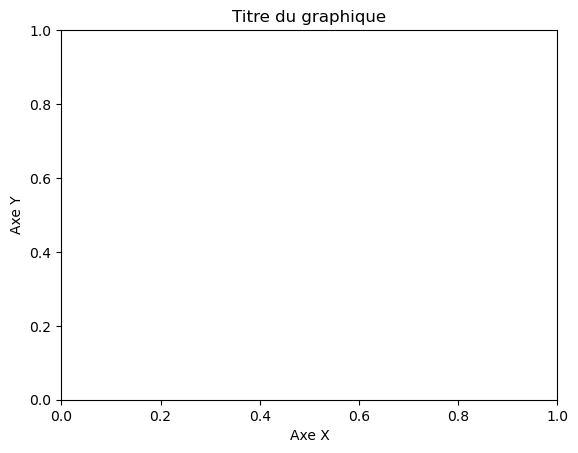

In [7]:
# 1. Importation de la bibliothèque
import matplotlib.pyplot as plt

# 2. Création d'une figure (canevas)
plt.figure()

# 3. Création du graphique avec les fonctions appropriées
# ...votre code de visualisation...

# 4. Personnalisation (titres, légendes, etc.)
plt.title('Titre du graphique')
plt.xlabel('Axe X')
plt.ylabel('Axe Y')

# 5. Affichage du graphique
plt.show()

# 6. Fermeture de la figure (libération des ressources)
plt.close()

Cette structure vous garantit une utilisation optimale et propre de Matplotlib.

## Importation et nettoyage des données

Avant de créer nos visualisations, préparons notre jeu de données. Nous utiliserons un dataset sur les athlètes olympiques de 1886 à 2016, disponible sur [Kaggle](https://www.kaggle.com).

### Importation des données

In [8]:
# Importation des bibliothèques nécessaires
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Chargement du dataset
data = pd.read_csv('athlete_events.csv', index_col=[1])

# Affichage des premières lignes
data.head()

,ID,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
Name,,,,,,,,,,,,,,
A Dijiang,1,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
A Lamusi,2,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
Gunnar Nielsen Aaby,3,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
Edgar Lindenau Aabye,4,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
Christine Jacoba Aaftink,5,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


### Nettoyage des données

Vérifions d'abord les valeurs manquantes :

In [11]:
# Identification des valeurs manquantes
data.isna().sum()


ID             0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

Nous constatons que quatre variables (`Age`, `Height`, `Weight` et `Medal`) contiennent des valeurs manquantes qu'il faut traiter.

**Étape 1 : Traitement de la variable `Medal`**

In [18]:
# Remplacement des valeurs manquantes par "None"
data['Medal'] = data['Medal'].fillna("None")

**Étape 2 : Création de deux dataframes distincts**

Pour une analyse optimale, nous allons créer :
1. `data_quanti` : avec suppression des lignes contenant des valeurs manquantes (pour l'analyse quantitative)
2. `data_quali` : avec remplacement des valeurs manquantes par la moyenne (pour l'analyse qualitative)

In [19]:
# Dataframe quantitatif : suppression des valeurs manquantes
print(f"Dimension du dataframe original: {data.shape}")

data_quanti = data.dropna(how='any')
print(f"Après suppression des valeurs manquantes: {data_quanti.shape}")

data_quanti = data_quanti.drop_duplicates()
print(f"Après suppression des doublons: {data_quanti.shape}")

# Dataframe qualitatif : remplacement par la moyenne
data_quali = data.drop_duplicates()
print(f"Dimension après suppression des doublons: {data_quali.shape}")

# Remplacement des valeurs manquantes par la moyenne
data_quali.loc[:, ['Age', 'Height', 'Weight']] = data_quali.loc[:, ['Age', 'Height', 'Weight']].fillna(
    data_quali.loc[:, ['Age', 'Height', 'Weight']].mean()
)

# Dimensions finales
print(f"Dimension data_quanti: {data_quanti.shape}")
print(f"Dimension data_quali: {data_quali.shape}")

Dimension du dataframe original: (271116, 14)
Après suppression des valeurs manquantes: (206165, 14)
Après suppression des doublons: (206152, 14)
Dimension après suppression des doublons: (269731, 14)
Dimension data_quanti: (206152, 14)
Dimension data_quali: (269731, 14)


**Important :** Pour toute visualisation impliquant des variables quantitatives (`Age`, `Height`, `Weight`), nous utiliserons `data_quanti`. Pour les variables qualitatives, nous utiliserons `data_quali`.

## Notre première figure avec Matplotlib

Entrons maintenant dans le vif du sujet en créant nos premières visualisations. Commençons par importer notre module principal :

In [20]:
# Importation de pyplot
import matplotlib.pyplot as plt

Pour tracer une courbe avec Matplotlib, nous utilisons la fonction `plot()` selon la syntaxe suivante :
```python
plt.plot(X, Y)
```

Où :
- `X` est un vecteur d'abscisses
- `Y` est un vecteur d'ordonnées
- `X` et `Y` doivent avoir la même longueur

### Exemple 1 : La première bissectrice

Commençons par un exemple simple : tracer la droite d'équation y = x dans l'intervalle [-20, 20].

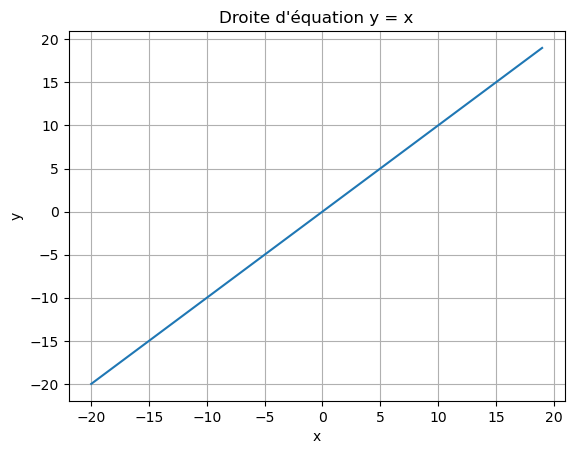

In [21]:
# Préparation des données avec NumPy
import numpy as np
vector = range(-20, 20)
array = np.array(vector)
X = Y = array

# Création de la figure
plt.figure()
plt.plot(X, Y)
plt.title("Droite d'équation y = x")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)  # Ajout d'une grille pour plus de lisibilité
plt.show()
plt.close()

### Exemple 2 : Fonction cubique

Représentons maintenant la fonction $x \mapsto x^3$ dans l'intervalle [-20, 20] :

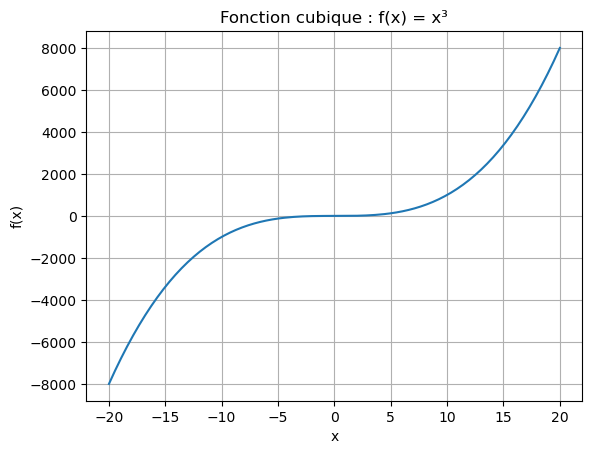

In [22]:
# Préparation des données avec NumPy
X = np.linspace(-20, 20, 150, dtype='float', endpoint=True)
Y = X**3

# Création de la figure
plt.figure()
plt.plot(X, Y)
plt.title("Fonction cubique : f(x) = x³")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.show()
plt.close()

> 💡 **Astuce :** La fonction `linspace()` de NumPy est parfaite pour générer des valeurs régulièrement espacées, idéales pour tracer des fonctions mathématiques.

## Nuage de points avec `plot()`

Utilisons maintenant notre dataframe `data_quanti` pour représenter un nuage de points. Nous allons visualiser la relation entre la taille et le poids des athlètes.

Pour créer un nuage de points avec `plot()`, nous devons spécifier :
- Le paramètre `marker` qui définit la forme des points (`'o'`, `'*'`, `'v'`, etc.)
- Le paramètre `linestyle=''` qui indique que les points ne doivent pas être reliés

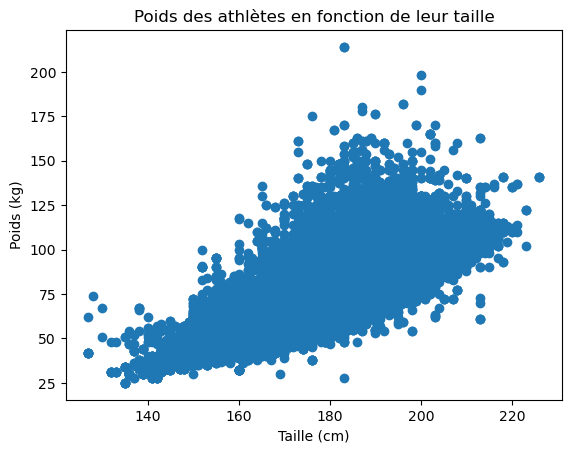

In [23]:
# Création d'un nuage de points simple
plt.figure()
plt.plot(data_quanti['Height'], data_quanti['Weight'], marker='o', linestyle='')
plt.title("Poids des athlètes en fonction de leur taille")
plt.xlabel("Taille (cm)")
plt.ylabel("Poids (kg)")
plt.show()
plt.close()

### Personnalisation du nuage de points

Améliorons notre visualisation en ajustant la taille des points :

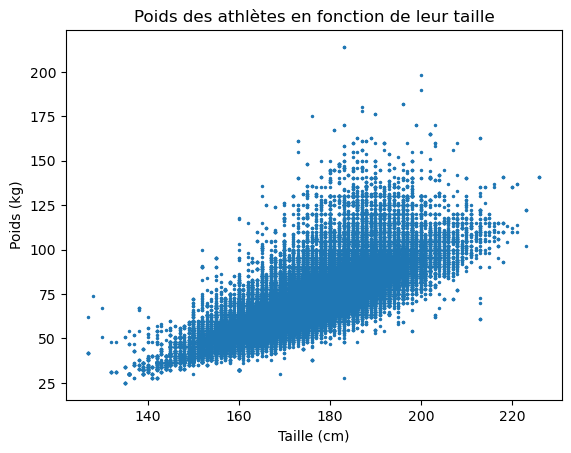

In [25]:
# Nuage de points avec points plus petits
plt.figure()
plt.plot(data_quanti['Height'], data_quanti['Weight'], marker='o', linestyle='', markersize=1.5)
plt.title("Poids des athlètes en fonction de leur taille")
plt.xlabel("Taille (cm)")
plt.ylabel("Poids (kg)")
plt.show()
plt.close()

### Ajout de titres, couleurs et amélioration de la résolution

Rendons notre graphique plus expressif avec des couleurs et une meilleure résolution :

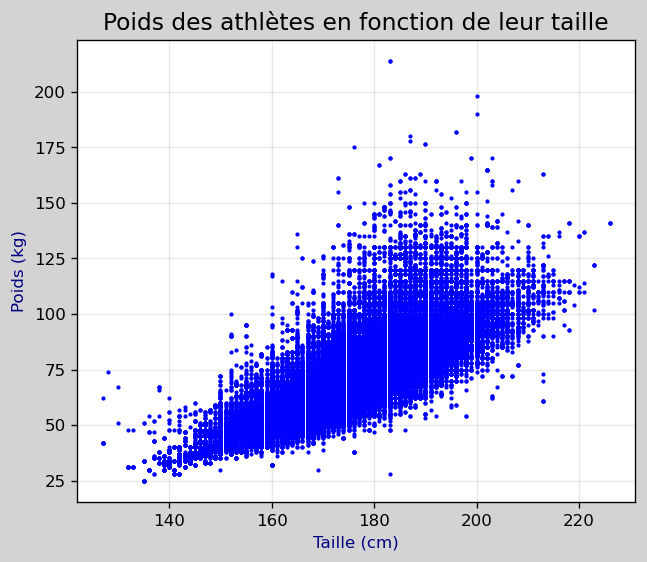

In [27]:
# Création d'une figure personnalisée
plt.figure(figsize=[6, 5], dpi=120, facecolor='lightgray')
plt.plot(data_quanti['Height'], data_quanti['Weight'], marker='o', color='blue', linestyle='', markersize=1.5)
plt.title("Poids des athlètes en fonction de leur taille", fontsize=14)
plt.xlabel("Taille (cm)", color='navy')
plt.ylabel("Poids (kg)", color='navy')
plt.grid(alpha=0.3)  # Grille légère
plt.show()
plt.close()

### Enregistrement d'un graphique

Vous pouvez facilement sauvegarder vos visualisations avec la fonction `savefig()` :

```python
# Création et sauvegarde d'une figure haute résolution
plt.figure(figsize=[6, 5], dpi=150, facecolor='lightgray')
plt.plot(data_quanti['Height'], data_quanti['Weight'], marker='o', color='blue', linestyle='', markersize=1.5)
plt.title("Poids des athlètes en fonction de leur taille")
plt.xlabel("Taille (cm)", color='navy')
plt.ylabel("Poids (kg)", color='navy')
plt.grid(alpha=0.3)
plt.savefig('Poids_athleteHD.png', dpi=300)
plt.close()
```

> 💡 **Note :** L'image est enregistrée dans le répertoire courant de votre projet.

### Tracer plusieurs courbes sur un même graphique

Pour représenter plusieurs séries de données sur un même graphique, il suffit d'appeler `plot()` plusieurs fois. Ajoutons un second nuage de points montrant l'âge en fonction de la taille :

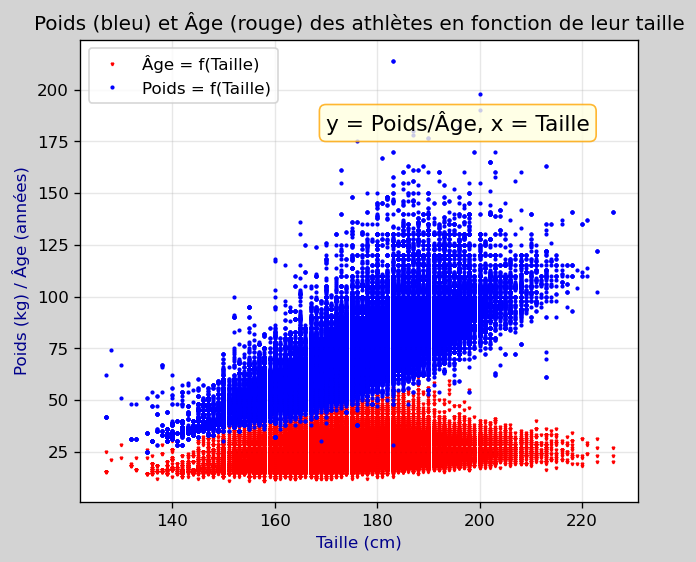

In [29]:
# Figure avec deux séries de données
plt.figure(figsize=[6, 5], dpi=120, facecolor='lightgray')

# Premier nuage de points : Âge en fonction de la taille
plt.plot(data_quanti['Height'], data_quanti['Age'], 
         label='Âge = f(Taille)', marker='v', color='red', linestyle='', markersize=1.5)

# Second nuage de points : Poids en fonction de la taille
plt.plot(data_quanti['Height'], data_quanti['Weight'], 
         label='Poids = f(Taille)', marker='o', color='blue', linestyle='', markersize=1.5)

# Ajout d'une annotation textuelle
plt.text(170, 180, 'y = Poids/Âge, x = Taille', size=13, 
         bbox=dict(boxstyle='round', fc='lightyellow', ec='orange', alpha=0.8))

# Personnalisation du graphique
plt.title("Poids (bleu) et Âge (rouge) des athlètes en fonction de leur taille")
plt.xlabel("Taille (cm)", color='darkblue')
plt.ylabel("Poids (kg) / Âge (années)", color='darkblue')
plt.legend(loc='upper left')
plt.grid(alpha=0.3)
plt.show()
plt.close()

La fonction `subplot()` permet de créer plusieurs sous-graphiques au sein d'une même figure. Sa syntaxe est :
```python
plt.subplot(nombre_lignes, nombre_colonnes, indice)
```

### Exemple avec trois graphiques sur une ligne

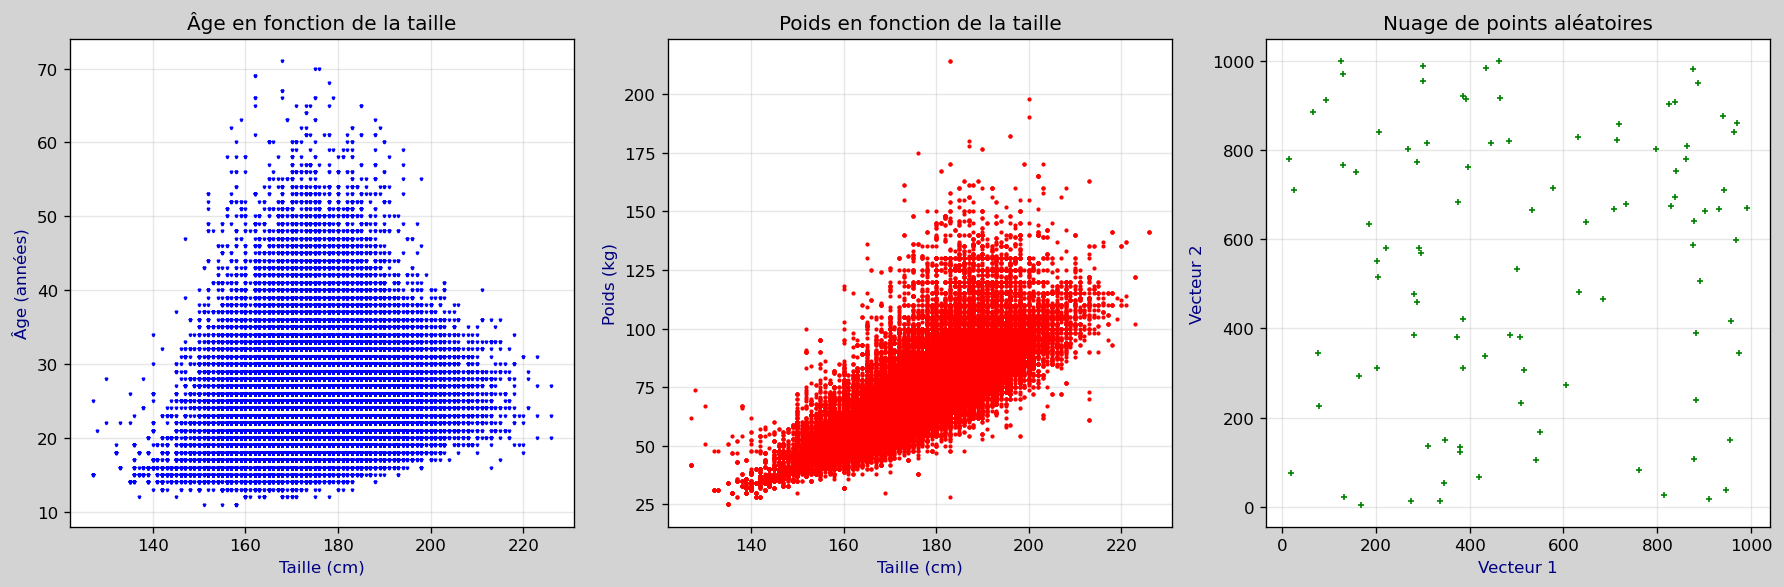

In [30]:
# Création de vecteurs aléatoires pour le troisième graphique
import numpy as np
vecteur1 = np.random.choice(list(range(1, 1000)), 100)
vecteur2 = np.random.choice(list(range(1, 1000)), 100)

# Création d'une figure avec trois sous-graphiques
plt.figure(figsize=[15, 5], dpi=120, facecolor='lightgray')

# Premier sous-graphique : Âge en fonction de la taille
plt.subplot(1, 3, 1)
plt.plot(data_quanti['Height'], data_quanti['Age'], marker='v', 
         color='blue', linestyle='', markersize=1.5)
plt.title('Âge en fonction de la taille')
plt.xlabel("Taille (cm)", color='navy')
plt.ylabel("Âge (années)", color='navy')
plt.grid(alpha=0.3)

# Deuxième sous-graphique : Poids en fonction de la taille
plt.subplot(1, 3, 2)
plt.plot(data_quanti['Height'], data_quanti['Weight'], marker='o', 
         color='red', linestyle='', markersize=1.5)
plt.title('Poids en fonction de la taille')
plt.xlabel("Taille (cm)", color='navy')
plt.ylabel("Poids (kg)", color='navy')
plt.grid(alpha=0.3)

# Troisième sous-graphique : Nuage de points aléatoires
plt.subplot(1, 3, 3)
plt.plot(vecteur1, vecteur2, marker='+', color='green', linestyle='', markersize=3.5)
plt.title("Nuage de points aléatoires")
plt.xlabel("Vecteur 1", color='navy')
plt.ylabel("Vecteur 2", color='navy')
plt.grid(alpha=0.3)

# Ajustement automatique des espaces entre les sous-graphiques
plt.tight_layout()
plt.show()
plt.close()

## Combiner plusieurs figures avec `subplots`

Pour des dispositions plus complexes (plusieurs lignes et colonnes), la fonction `subplots()` de la couche Artist de Matplotlib offre davantage de flexibilité.

```python
# Syntaxe de base
fig, axes = plt.subplots(nrows, ncols, options...)
```

La principale différence avec `subplot()` est que `subplots()` :
- Retourne un tuple `(fig, axes)` où `fig` est l'objet figure et `axes` est un tableau d'objets axes
- Utilise une syntaxe orientée objet pour la personnalisation

Les méthodes de personnalisation correspondent aux fonctions de pyplot :
- `plt.title()` → `ax.set_title()`
- `plt.xlabel()` → `ax.set_xlabel()`
- `plt.ylabel()` → `ax.set_ylabel()`

### Utilisation de `scatter()` pour les nuages de points

La fonction `scatter()` offre une alternative à `plot()` pour créer des nuages de points, avec plus d'options de personnalisation :

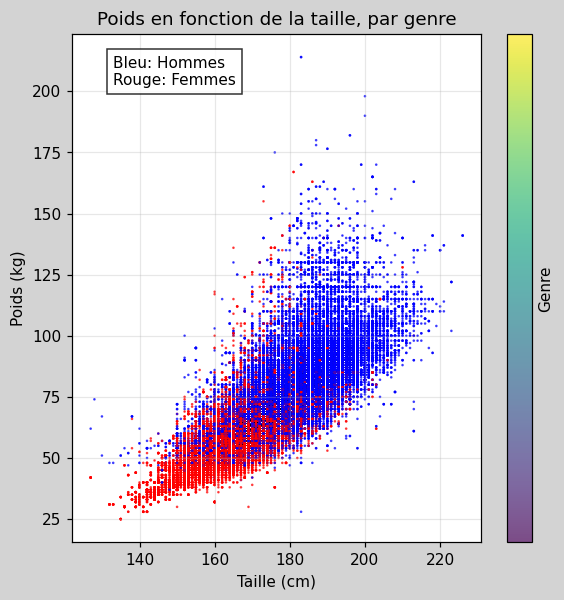

In [34]:
# Fonction pour déterminer la couleur selon le sexe
def couleur(x):
    if x == "F":
        return 'red'
    else:
        return 'blue'

# Création d'un nuage de points avec scatter()
plt.figure(figsize=(6, 6), facecolor='lightgray', dpi=110)
plt.scatter(data_quanti['Height'], data_quanti['Weight'], 
           c=data_quanti['Sex'].apply(couleur), s=0.5, alpha=0.7)
plt.title("Poids en fonction de la taille, par genre")
plt.xlabel("Taille (cm)")
plt.ylabel("Poids (kg)")
plt.colorbar(label="Genre", ticks=[])  # Astuce: une barre de couleur vide
plt.text(0.1, 0.9, "Bleu: Hommes\nRouge: Femmes", transform=plt.gca().transAxes, 
         bbox=dict(facecolor='white', alpha=0.8))
plt.grid(alpha=0.3)
plt.show()
plt.close()

> 💡 **Observation :** Comme prévu, les athlètes de plus petite taille sont majoritairement des femmes.

## Les différents types de graphes

### Graphiques à barres (Bar Graph)

Les graphiques à barres sont parfaits pour visualiser des variables qualitatives. On utilise la fonction `bar()` avec la syntaxe :

```python
plt.bar(x_labels, y_values)
```

#### Exemple 1 : Nombre d'organisation des JO par ville

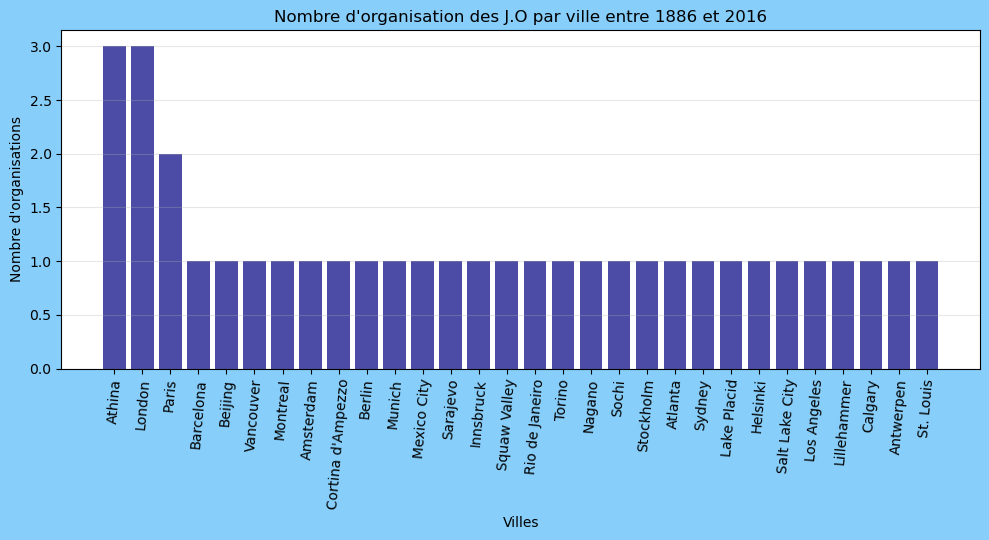

In [37]:
# Préparation des données
data_date = data_quali.drop_duplicates(subset=['Year'])
Xlabels = data_date['City'].value_counts().keys()
Ylabels = data_date['City'].value_counts().values

# Création du graphique à barres
plt.figure(figsize=(10, 5.5), facecolor='lightskyblue')
plt.bar(Xlabels, Ylabels, color='navy', alpha=0.7)
plt.xlabel('Villes')
plt.ylabel("Nombre d'organisations")
plt.xticks(Xlabels, rotation=85)
plt.title("Nombre d'organisation des J.O par ville entre 1886 et 2016")
plt.grid(axis='y', alpha=0.3)  # Grille horizontale uniquement
plt.tight_layout()  # Ajustement automatique des marges
plt.show()
plt.close()

#### Exemple 2 : Top 10 des villes ayant accueilli le plus d'athlètes

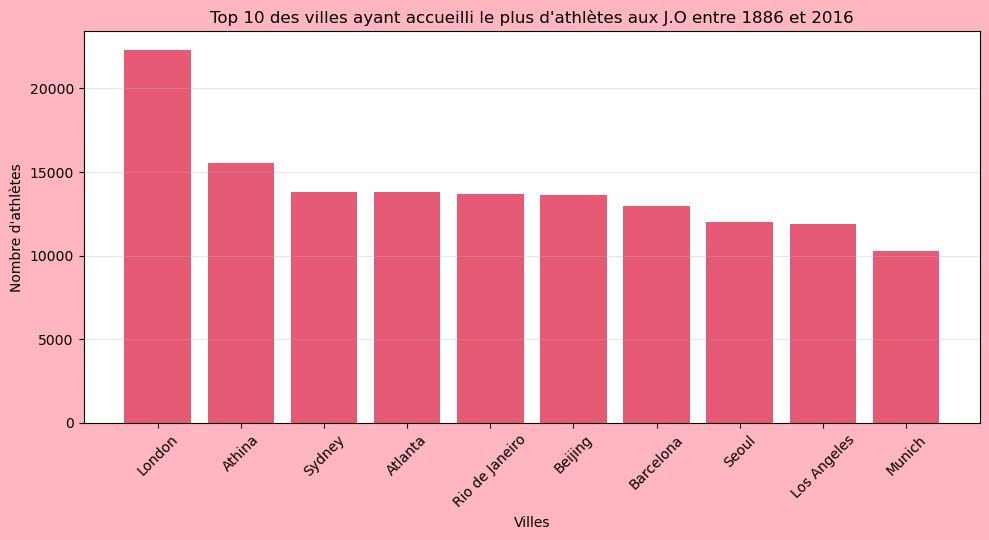

In [39]:
# Préparation des données du top 10
Xlabels = data_quali['City'].value_counts().keys()[:10]
Ylabels = data_quali['City'].value_counts().values[:10]

# Création du graphique
plt.figure(figsize=(10, 5.5), facecolor='lightpink')
plt.bar(Xlabels, Ylabels, color='crimson', alpha=0.7)
plt.xlabel('Villes')
plt.ylabel("Nombre d'athlètes")
plt.xticks(Xlabels, rotation=45)
plt.title("Top 10 des villes ayant accueilli le plus d'athlètes aux J.O entre 1886 et 2016")
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()
plt.close()

### Graphiques à barres groupées

Les graphiques à barres groupées permettent de comparer plusieurs catégories côte à côte.

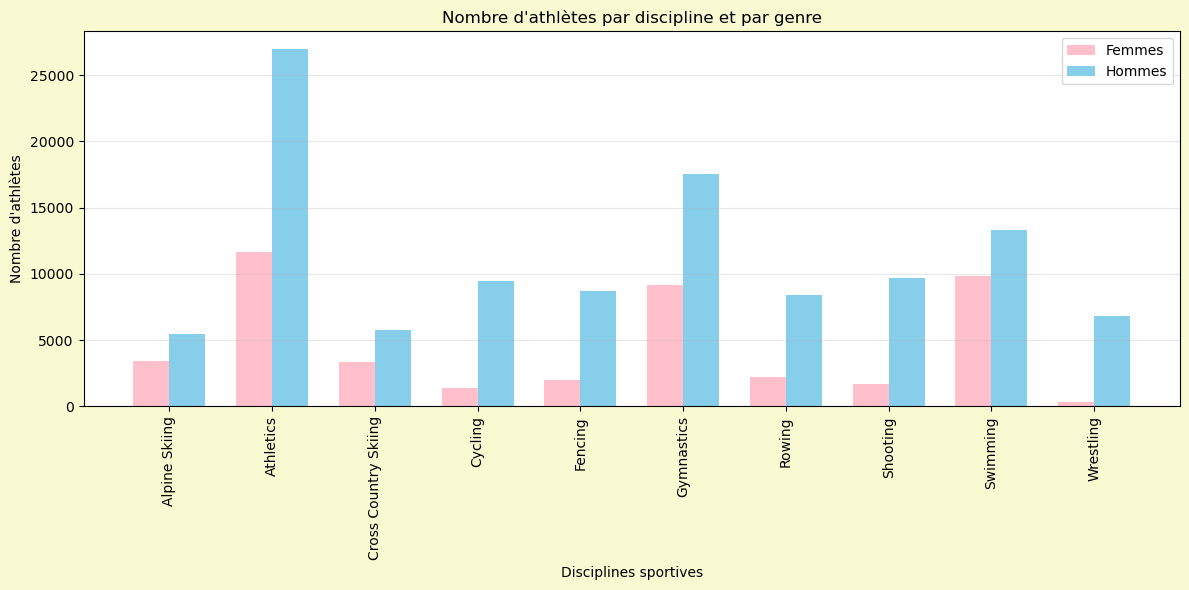

In [40]:
# Récupération des 10 sports les plus populaires
sport_pop = data_quali['Sport'].value_counts().keys()[:10]
data_pop = data_quali[data_quali['Sport'].isin(sport_pop)]

# Création d'un dataframe avec le nombre d'hommes et de femmes par sport
data_count = data_pop.groupby(['Sport', 'Sex']).size().unstack(0)

# Positions pour les barres
position = np.arange(len(data_count.columns))
width = 0.35  # Largeur des barres

# Création du graphique
plt.figure(figsize=(12, 6), facecolor='lightgoldenrodyellow')

# Barres pour les femmes
plt.bar(position - width/2, data_count.loc['F'], width, color='pink', label='Femmes')

# Barres pour les hommes
plt.bar(position + width/2, data_count.loc['M'], width, color='skyblue', label='Hommes')

# Personnalisation
plt.xticks(position, data_count.columns, rotation=90)
plt.legend()
plt.ylabel("Nombre d'athlètes")
plt.xlabel('Disciplines sportives')
plt.title("Nombre d'athlètes par discipline et par genre")
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()
plt.close()

### Graphiques à barres empilées

Les graphiques à barres empilées montrent les parts relatives de chaque catégorie.

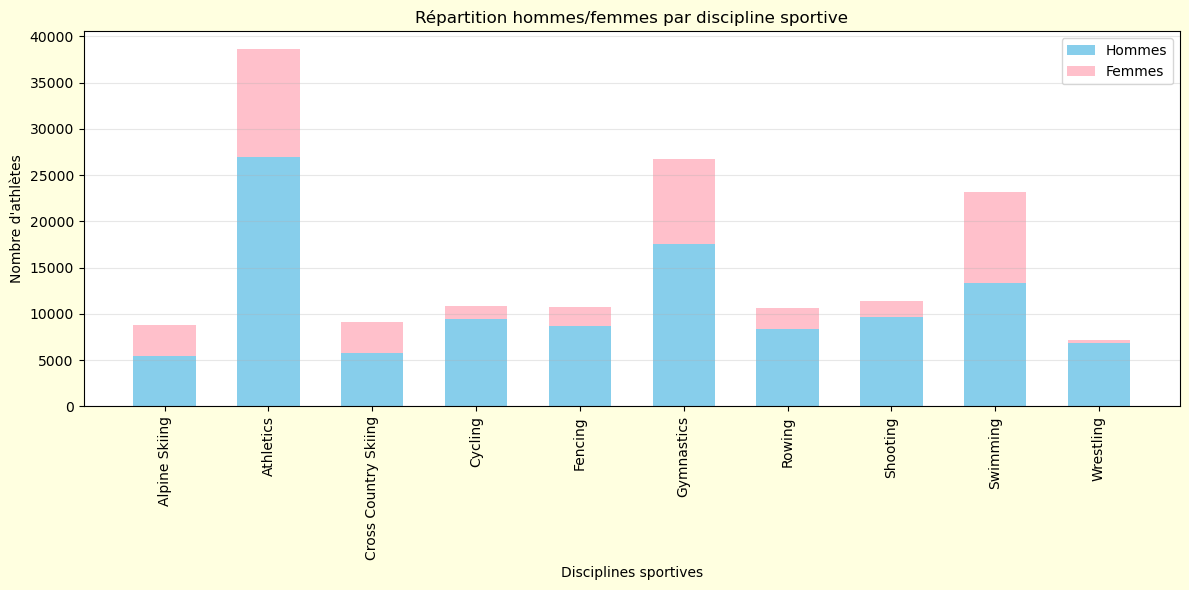

In [41]:
# Création du graphique à barres empilées
plt.figure(figsize=(12, 6), facecolor='lightyellow')

# Barres pour les hommes (base)
plt.bar(data_count.columns, data_count.loc['M'], width=0.6, label='Hommes', color='skyblue')

# Barres pour les femmes (empilées)
plt.bar(data_count.columns, data_count.loc['F'], bottom=data_count.loc['M'], 
        width=0.6, color='pink', label='Femmes')

# Personnalisation
plt.xticks(range(len(data_count.columns)), data_count.columns, rotation=90)
plt.legend()
plt.ylabel("Nombre d'athlètes")
plt.xlabel('Disciplines sportives')
plt.title("Répartition hommes/femmes par discipline sportive")
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()
plt.close()

### Boîtes à moustaches (Boxplot)

Les boîtes à moustaches sont idéales pour visualiser la distribution statistique des données.

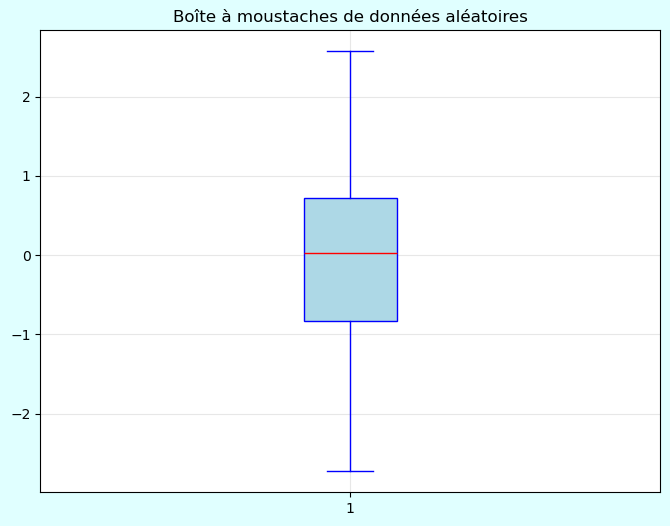

In [43]:
# Exemple simple avec des données aléatoires
plt.figure(figsize=(8, 6), facecolor='lightcyan')
plt.boxplot(np.random.randn(150), patch_artist=True, 
            boxprops=dict(facecolor='lightblue', color='blue'),
            whiskerprops=dict(color='blue'),
            capprops=dict(color='blue'),
            medianprops=dict(color='red'))
plt.title("Boîte à moustaches de données aléatoires")
plt.grid(alpha=0.3)
plt.show()
plt.close()

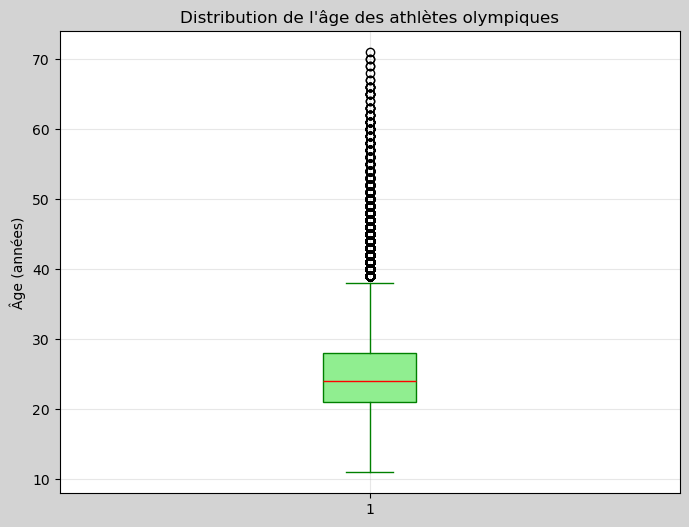

In [44]:
# Boxplot de l'âge des athlètes
plt.figure(figsize=(8, 6), facecolor='lightgray')
plt.boxplot(data_quanti['Age'], showfliers=True, patch_artist=True,
            boxprops=dict(facecolor='lightgreen', color='green'),
            whiskerprops=dict(color='green'),
            capprops=dict(color='green'),
            medianprops=dict(color='red'))
plt.title("Distribution de l'âge des athlètes olympiques")
plt.ylabel("Âge (années)")
plt.grid(alpha=0.3)
plt.show()
plt.close()

> 💡 **Note :** Avec l'option `showfliers=False`, vous pouvez masquer les valeurs extrêmes (outliers).

### Histogrammes et diagrammes circulaires

#### Histogrammes

Les histogrammes montrent la distribution des fréquences d'une variable continue.

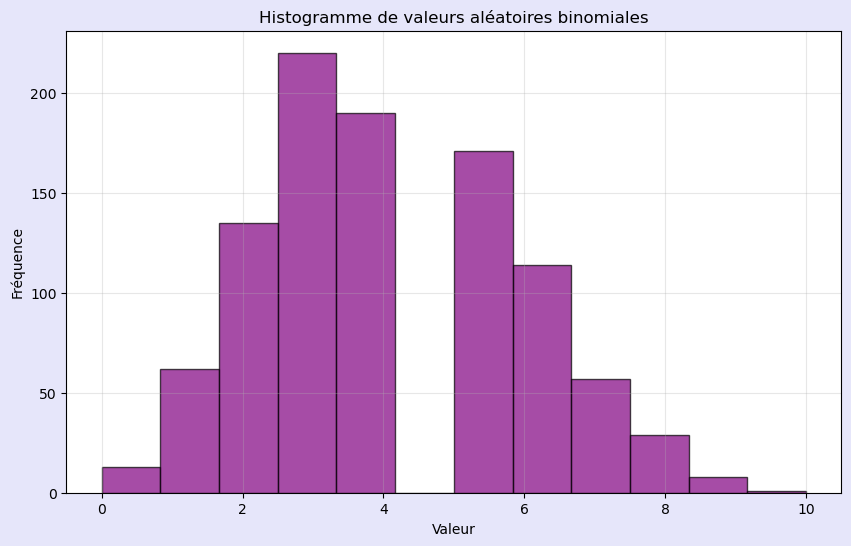

In [45]:
# Génération de données selon une loi binomiale
X = np.random.binomial(n=20, p=0.2, size=1000)

# Création de l'histogramme
plt.figure(figsize=(10, 6), facecolor='lavender')
plt.hist(X, bins=12, edgecolor='black', color='purple', alpha=0.7)
plt.title('Histogramme de valeurs aléatoires binomiales')
plt.xlabel('Valeur')
plt.ylabel('Fréquence')
plt.grid(alpha=0.3)
plt.show()
plt.close()

#### Diagrammes circulaires (Pie Charts)

Les diagrammes circulaires sont parfaits pour montrer les proportions relatives.

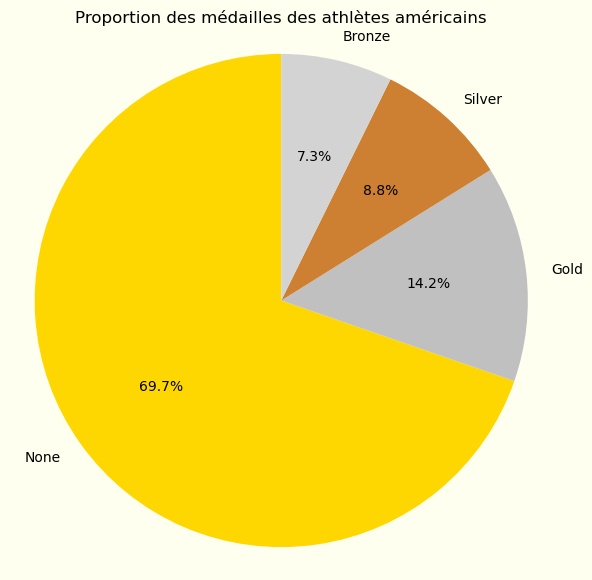

In [47]:
# Préparation des données pour les médailles américaines
data_pie = data_quali[data_quali['NOC'] == 'USA']
labels = data_pie['Medal'].value_counts().keys().tolist()
pie_data = data_pie['Medal'].value_counts().values

# Création du diagramme circulaire
plt.figure(figsize=(7, 7), facecolor='ivory')
plt.pie(pie_data, labels=labels, autopct='%1.1f%%', startangle=90,
        colors=['gold', 'silver', '#cd7f32', 'lightgray'])
plt.title("Proportion des médailles des athlètes américains")
plt.axis('equal')  # Pour un cercle parfait
plt.show()
plt.close()

## Conclusion

Ce tutoriel vous a permis de découvrir les principales fonctionnalités de Matplotlib pour créer des visualisations efficaces. Vous avez appris à :

1. Créer des graphiques simples (courbes, nuages de points)
2. Personnaliser vos visualisations (couleurs, titres, légendes)
3. Combiner plusieurs graphiques avec `subplot()` et `subplots()`
4. Utiliser différents types de visualisations (barres, boîtes à moustaches, histogrammes, diagrammes circulaires)

Matplotlib est une bibliothèque extrêmement puissante qui offre bien plus de possibilités que celles abordées dans ce tutoriel. Pour approfondir vos connaissances, n'hésitez pas à consulter :

- La [documentation officielle de Matplotlib](https://matplotlib.org/stable/contents.html)
- Les [exemples de la galerie Matplotlib](https://matplotlib.org/stable/gallery/index.html)
- Le livre "Python pour la Data Science" d'Amandine VELT

N'hésitez pas à me contacter pour toute question ou suggestion d'amélioration !

---

*© MEFIRA Mohamadou - Tous droits réservés*